In [2]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('placement.csv')

In [10]:
df.shape


(100, 2)

In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [16]:
df = df.iloc[:,1:]

In [17]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [18]:
import matplotlib.pyplot as plt

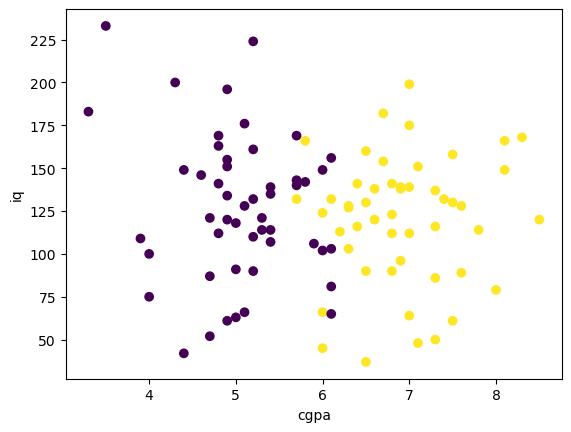

In [22]:
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.scatter(df['cgpa'],df['iq'], c =df['placement'])


In [25]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [26]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [27]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [30]:
x_train

,cgpa,iq
16,5.2,224.0
43,6.8,141.0
46,5.3,114.0
92,5.2,110.0
88,4.4,149.0
...,...,...
14,6.1,103.0
68,4.0,75.0
45,6.0,66.0
27,6.0,124.0


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [36]:
x_train = scaler.fit_transform(x_train)

In [37]:
x_train

array([[-0.66449602,  2.53169043],
       [ 0.73240072,  0.39766566],
       [-0.57718997, -0.29653517],
       [-0.66449602, -0.39937974],
       [-1.36294439,  0.60335479],
       [ 1.16893095, -0.24511289],
       [ 0.1212584 ,  0.78333279],
       [-0.14065974,  1.0404442 ],
       [ 0.47048258,  0.88617735],
       [-0.14065974,  0.4233768 ],
       [ 0.81970677,  0.32053223],
       [ 0.03395235, -0.60506887],
       [-0.22796579,  0.44908794],
       [-0.92641416,  0.65477708],
       [ 0.81970677,  0.34624338],
       [-1.0137202 , -0.34795745],
       [ 0.90701281,  1.27184448],
       [-0.22796579,  0.37195452],
       [ 0.47048258, -2.27629309],
       [ 0.99431886, -1.99347053],
       [ 0.73240072, -0.91360257],
       [-1.36294439, -2.14773738],
       [-0.22796579,  1.11757763],
       [ 0.03395235, -2.07060395],
       [-0.66449602, -0.91360257],
       [ 1.16893095, -1.94204824],
       [ 0.64509467,  0.7319105 ],
       [ 0.1212584 ,  0.16626538],
       [ 1.86737932,

In [38]:
x_test = scaler.fit_transform(x_test)

In [40]:
x_test

array([[-1.22358934, -1.00298792],
       [-0.83514828,  0.67643371],
       [ 0.03884411,  0.51315661],
       [-0.15537642, -0.58313251],
       [-0.83514828,  0.1866024 ],
       [ 0.71861596,  2.16925294],
       [ 1.68971862, -0.62978311],
       [-1.32069961, -1.04963852],
       [ 0.71861596,  0.76973491],
       [ 1.20416729, -1.04963852]])

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [45]:
clf.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_pred=clf.predict(x_test)

In [47]:
y_test

7     0
49    0
63    1
78    0
41    0
26    1
58    1
73    0
32    1
44    1
Name: placement, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_pred)

1.0

In [55]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

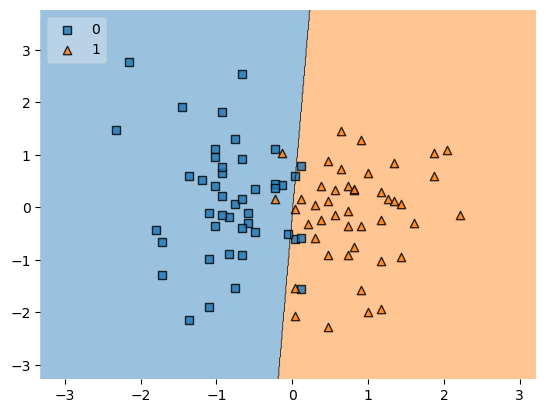

In [57]:
plot_decision_regions (x_train,y_train.values,clf=clf, legend=2)

In [58]:
import pickle

In [59]:
pickle.dump(clf,open('model.pkl','wb'))